Ćwiczenia z data camp - Wprowadzenie do uczenia maszynowego w pythonie - biblioteka (scikit - learn) -> slearn 

In [41]:
#Cwiczenie 1 - inicjacja modelu - fit i predict - ogolny zarys, pseudokod
#from sklearn.module import Model                #gdzie model to wybrany jakis znany modul
#model = Model()
#model.fit(X,y)                                  #X - nasze dane wejsciowe, y to nasza zmienna uczaca - target variable
#predictions = model.predict(X_new)              #X_new to zmienna wydajaca na podstawie nauczenia sie z X nowe zmienne - predykcje 
#print(predictions)

In [42]:
#*** inicjacja losowego churna do cwiczen - załóżmy że jesteśmy sklepem i probujemy przewidziec odejscie lub pozostanie klientow 
import numpy as np
import pandas as pd
np.random.seed(42)          #ustwiany ziarno losowosci (w celu powtarzalnoci wynikow)
#uzywamy danych losowych z rozkladu normalnego --> np.random.normal(loc, scale, size)--> loc=mean, scale=sd, size=n 
churn_df = pd.DataFrame({
    "total_day_change": np.random.normal(30, 10, 333),   # zmiany dzienne
    "total_eve_change": np.random.normal(20, 8, 333),    # zmiany wieczorne
    "churn": np.random.randint(0, 2, 333)                # 0 = nie odszedł, 1 = odszedł
})
churn_df.head

<bound method NDFrame.head of      total_day_change  total_eve_change  churn
0           34.967142         14.582706      1
1           28.617357         27.800958      0
2           36.476885         18.823541      0
3           45.230299         13.396022      1
4           27.658466         17.428913      1
..                ...               ...    ...
328         36.241198         15.625128      0
329         36.283455         19.737974      0
330         29.877532         15.652602      1
331         21.027456         14.297234      0
332         30.758046         20.851442      1

[333 rows x 3 columns]>

In [43]:
#ćwiczenie 2 - inicjacja Knn 
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
#churn_df = pd.read_csv("churn.csv")            #czasem trzeba wczytac churna (koniecznie jako tabele (moze byc array z numpy))
#my bierzemy gotowego churna na potrzeby cwiczen (patrz ***)
X = churn_df[["total_day_change", "total_eve_change"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)

(333, 2) (333,)


interpretacja tego jest taka ze mamy dwie cechy po 100 obserwacji i mamy zmienna zalezna jedna z 100 obserwacjami 
czyli X ma 2 kolumny i 100 wierszy a y ma 100 wierszy i 1 kolumne

In [44]:
#idac dalej - wezmy knn dla 10 neighbors
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X, y)                                   #mamy dopasowanie 
#jakis losowy np.array (nie wazne czy sensowny) - nowe dane (wymagana klasyfikacja)
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])
predictions = knn.predict(X_new)                #predykcja dla nowych wartosci (sklasyfikowanie ich)
print(f"Predykcja: {predictions}")

Predykcja: [0 0 0]


Interpretacja: [1,1,1] - kliencie odchodza
               [0,1,1] - 2 z 3 klientów odejdą itp. 
churn - po angielsku wskaźnik rezygnacji klientów

Spróbujmy zooptymalizowac nasze predykcje - ocenic je oraz znalezc najbardziej optymalne k dla jak najbardziej wiarygodnej analizy

In [45]:
#teraz przejdzmy do zmierzenia dokladnosci naszych predykcji - w tym celu nalezy rozdzielic pakiet danych na zestaw testowy oraz treningowy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.47761194029850745


0.45 - Moze to byc trocha slaba predykcja - znajdzmy najlepsze k

1
{1: 1.0}
{1: 0.4626865671641791}
2
{1: 1.0, 2: 0.7518796992481203}
{1: 0.4626865671641791, 2: 0.5373134328358209}
3
{1: 1.0, 2: 0.7518796992481203, 3: 0.7293233082706767}
{1: 0.4626865671641791, 2: 0.5373134328358209, 3: 0.5223880597014925}
4
{1: 1.0, 2: 0.7518796992481203, 3: 0.7293233082706767, 4: 0.6879699248120301}
{1: 0.4626865671641791, 2: 0.5373134328358209, 3: 0.5223880597014925, 4: 0.5074626865671642}
5
{1: 1.0, 2: 0.7518796992481203, 3: 0.7293233082706767, 4: 0.6879699248120301, 5: 0.650375939849624}
{1: 0.4626865671641791, 2: 0.5373134328358209, 3: 0.5223880597014925, 4: 0.5074626865671642, 5: 0.5671641791044776}
6
{1: 1.0, 2: 0.7518796992481203, 3: 0.7293233082706767, 4: 0.6879699248120301, 5: 0.650375939849624, 6: 0.631578947368421}
{1: 0.4626865671641791, 2: 0.5373134328358209, 3: 0.5223880597014925, 4: 0.5074626865671642, 5: 0.5671641791044776, 6: 0.47761194029850745}
7
{1: 1.0, 2: 0.7518796992481203, 3: 0.7293233082706767, 4: 0.6879699248120301, 5: 0.650375939849624, 

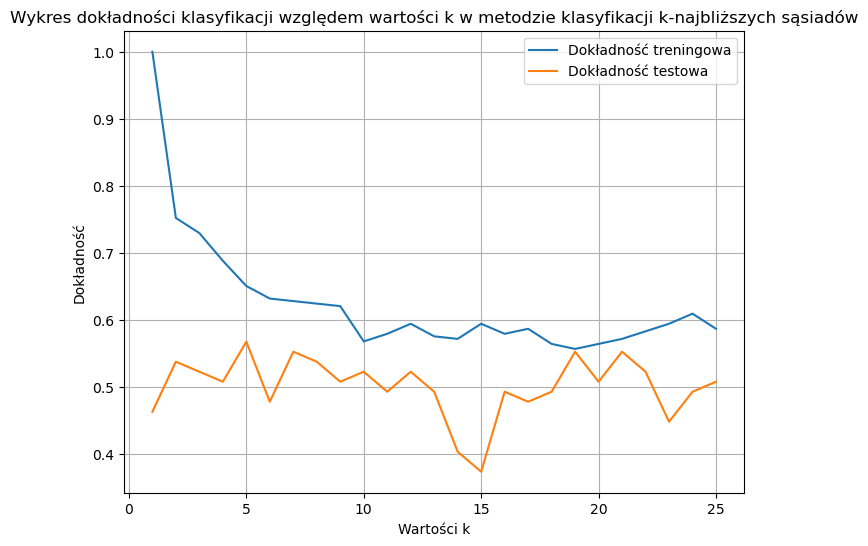

Najlepsze k: 5
Dokładność: 0.5671641791044776


In [47]:
#w celu znalezeinia najlepszego k napiszemy petle for 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
test_accuracy = {}
train_accuracy = {}
neighbors = np.arange(1,26)             #tworzymy tablice w danym zakresie 
#print(neighbors)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    test_accuracy[neighbor] = knn.score(X_test, y_test)                     #aby uniknąć [neighbor] mozna by dac zamiast słowników liste
    train_accuracy[neighbor] = knn.score(X_train, y_train)                  #ale lepiej słowniki bo nie zawsze bedziemy mieli doczynienia 
                                                                            #z liczbami - zawesze analize moga podlegac slowa 
    print(neighbor)
    print(train_accuracy)
    print(test_accuracy)

#narysujmy wykres w celu wizualizacji i oceny najlepszego k
import matplotlib.pyplot as plt
plt.figure(figsize =(8,6))
plt.title("Wykres dokładności klasyfikacji względem wartości k w metodzie klasyfikacji k-najbliższych sąsiadów")
plt.plot(neighbors, train_accuracy.values(), label="Dokładność treningowa")
plt.plot(neighbors, test_accuracy.values(), label="Dokładność testowa")
plt.legend()
plt.grid()
plt.xlabel("Wartości k")
plt.ylabel("Dokładność")
plt.show()

#najlepsze k 
best_k = max(test_accuracy, key=test_accuracy.get)
print("Najlepsze k:", best_k)
print("Dokładność:", test_accuracy[best_k])


Mając ogarnięty konept ogólny uczenia maszynowego (uczenia nadzorowanego) przejdzmy do regresji 